In [1]:
import time
import mlrose_hiive as mlrh
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [7, 7]

random_state = 2020
np.random.seed(1)

In [4]:
def plot_fitness_iteration(curve, title, x="Iteration", y="Fitness"):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    length = len(curve)
    plt.plot(range(length), curve, label=y, lw=2)
    plt.legend(loc="best")
    plt.show()

# Four Peaks Problem

In [5]:
# Problem definition
length = 150
t_pct = 0.9
global eval_count
eval_count = 0

base_fit_func = mlrh.FourPeaks(t_pct=t_pct).evaluate

def four_peaks_fit(state):
    global eval_count
    eval_count += 1

    return base_fit_func(state)


# Initialize custom fitness function object
fitness = mlrh.CustomFitness(four_peaks_fit)

prob = mlrh.DiscreteOpt(length=length,
                        fitness_fn=fitness,
                        maximize=True)
experiment_name = "four_peaks"
output_directory = "four_peaks"

## MIMIC

In [13]:
mim = mlrh.MIMICRunner(problem=prob,
                       experiment_name=experiment_name,
                       output_directory=output_directory,
                       seed=random_state,
                       population_sizes=[1000, 2000, 3000],
                       keep_percent_list=[0.05, 0.1, 0.15, 0.20],
                       iteration_list=[25],
                       max_attempts=100,
                       use_fast_mimic=True)
mim_stats, mim_curve = mim.run()

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.05], max_iters:[25]
runner_name:[mimic], experiment_name:[four_peaks], attempt:[0], iteration:[0], done:[False], time:[0.05], fitness:[0.0000]
	[0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0// 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0// 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1...

use_fast_mimic:[True], pop_size:[1000], keep_pct:[0.05], max_iters:[25]
runner_name:[mimic], experiment_name:[four_peaks], attempt:[18], iteration:[25], done:[True], time:[12.80], fitness:[32.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0.// 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], po

use_fast_mimic:[True], pop_size:[3000], keep_pct:[0.1], max_iters:[25]
runner_name:[mimic], experiment_name:[four_peaks], attempt:[1], iteration:[25], done:[True], time:[11.50], fitness:[82.0000]
	[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.// 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[3000], keep_pct:[0.15], max_iters:[25]
runner_name:[mimic], experiment_name:[four_peaks], attempt:[0], iteration:[0], done:[False], time:[0.13], fitness:[0.0000]
	[0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0// 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0// 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1...

use_fast_mimic:[True], pop_size:[3000], keep_pct:[0.15], max_iters:[25]
runner_name:[mimic], ex

In [14]:
show=10
columns = ['Time', 'Fitness', 'Population Size', 'Keep Percent']
pd.set_option('display.max_rows',show)
df=pd.read_csv("./four_peaks/four_peaks/mimic__four_peaks__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(show)

,Time,Fitness,Population Size,Keep Percent
19,11.504021,82.0,3000,0.10
9,11.225152,79.0,2000,0.05
11,7.807094,78.0,2000,0.10
21,16.162705,67.0,3000,0.15
17,25.564504,66.0,3000,0.05
13,10.018241,65.0,2000,0.15
3,5.917637,63.0,1000,0.10
23,17.442336,60.0,3000,0.20
15,12.241212,57.0,2000,0.20
5,5.990759,56.0,1000,0.15


MIMIC - Total Function Evaluations: 78043


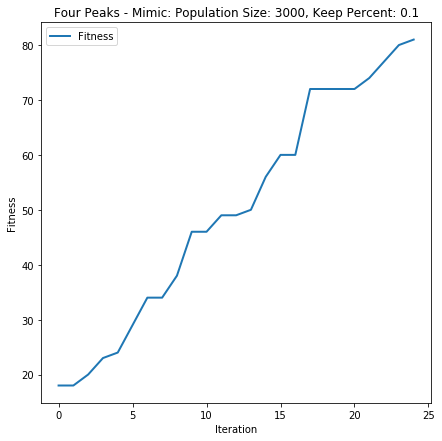

In [6]:
max_attempts = 100
max_iters = 25
keep_pct=0.1
pop_size = 3000
global eval_count
eval_count = 0
best_state, best_fitness, mimic_curve = mlrh.mimic(prob,
                                             max_attempts=max_attempts,
                                             max_iters=max_iters,
                                             random_state=random_state,
                                             pop_size=pop_size,
                                             keep_pct=keep_pct,
                                             curve=True)
print("MIMIC - Total Function Evaluations:", eval_count)
plot_fitness_iteration(mimic_curve,
                       "Four Peaks - Mimic: Population Size: {}, Keep Percent: {}".format(pop_size, keep_pct))

## Genetic Algorithm

In [16]:
ga = mlrh.GARunner(problem=prob,
                   experiment_name=experiment_name,
                   output_directory=output_directory,
                   seed=random_state,
                   max_attempts=20,
                   iteration_list=[25],
                   population_sizes=[500, 1000, 2000, 3000],
                   mutation_rates=[0.1, 0.25, 0.5, 0.75])
ga_stats, ga_curve = ga.run()

Running ga
*****************
*** Run START ***
*****************
pop_size:[500], mutation_prob:[0.1], max_iters:[25]
runner_name:[ga], experiment_name:[four_peaks], attempt:[0], iteration:[0], done:[False], time:[0.03], fitness:[0.0000]
	[0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0// 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0// 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1...

pop_size:[500], mutation_prob:[0.1], max_iters:[25]
runner_name:[ga], experiment_name:[four_peaks], attempt:[2], iteration:[25], done:[True], time:[2.41], fitness:[28.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1// 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1// 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[500], mutation_prob:[0.25], max_iters:[25]
runner_name:[ga], exper

pop_size:[2000], mutation_prob:[0.25], max_iters:[25]
runner_name:[ga], experiment_name:[four_peaks], attempt:[5], iteration:[25], done:[True], time:[9.73], fitness:[38.0000]
	[0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1// 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0// 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[2000], mutation_prob:[0.5], max_iters:[25]
runner_name:[ga], experiment_name:[four_peaks], attempt:[0], iteration:[0], done:[False], time:[0.09], fitness:[0.0000]
	[0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0// 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0// 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1...

pop_size:[2000], mutation_prob:[0.5], max_iters:[25]
runner_name:[ga], experiment_name:[four_peaks], attempt:[1], iteration:[25], done:[Tr

In [17]:
show=10
columns = ['Time', 'Fitness', 'Population Size', 'Mutation Rate']
pd.set_option('display.max_rows',show)
df=pd.read_csv("./four_peaks/four_peaks/ga__four_peaks__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(show)

,Time,Fitness,Population Size,Mutation Rate
25,15.241749,40.0,3000,0.10
19,9.729882,38.0,2000,0.25
29,14.600447,38.0,3000,0.50
31,14.374018,37.0,3000,0.75
21,9.530168,37.0,2000,0.50
23,9.306833,36.0,2000,0.75
17,9.897134,36.0,2000,0.10
11,4.758080,34.0,1000,0.25
5,2.295125,33.0,500,0.50
13,4.552805,33.0,1000,0.50


Genetic Alg - Total Function Evaluations: 78038


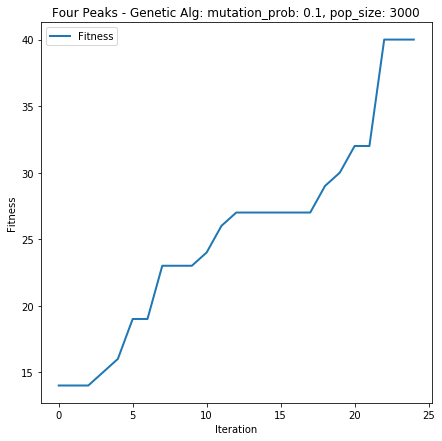

In [14]:
max_attempts = 100
max_iters = 25
mutation_prob=0.1
pop_size = 3000
global eval_count
eval_count = 0
best_state, best_fitness, gen_curve = mlrh.genetic_alg(prob,
                                                   max_attempts=max_attempts,
                                                   max_iters=max_iters,
                                                   random_state=random_state,
                                                   pop_size=pop_size,
                                                   mutation_prob=mutation_prob,
                                                   curve=True)
print("Genetic Alg - Total Function Evaluations:", eval_count)
plot_fitness_iteration(gen_curve,
                       "Four Peaks - Genetic Alg: mutation_prob: {}, pop_size: {}".format(mutation_prob, pop_size))

## Simulated Annealing

In [24]:
sa = mlrh.SARunner(problem=prob,
                   experiment_name=experiment_name,
                   output_directory=output_directory,
                   seed=random_state,
                   max_attempts=200,
                   iteration_list=[2500],
                   temperature_list=[0.05, 0.1, 0.5, 1, 10, 20, 25],
                   decay_list=[mlrh.GeomDecay, mlrh.ExpDecay, mlrh.ArithDecay])
sa_stats, sa_curve = sa.run()

Running sa
*****************
*** Run START ***
*****************
schedule:[0.05], max_iters:[2500]
runner_name:[sa], experiment_name:[four_peaks], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[0.0000]
	[0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0// 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0// 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1...

schedule:[0.05], max_iters:[2500]
runner_name:[sa], experiment_name:[four_peaks], attempt:[1], iteration:[2500], done:[True], time:[0.38], fitness:[28.0000]
	[1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0// 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1// 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[0.05], max_iters:[2500]
runner_name:[sa], experiment_name:[four_peaks], attempt:[0], iteration:[0], 

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[2500]
runner_name:[sa], experiment_name:[four_peaks], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[0.0000]
	[0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0// 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0// 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1...

schedule:[1], max_iters:[2500]
runner_name:[sa], experiment_name:[four_peaks], attempt:[1], iteration:[2500], done:[True], time:[0.38], fitness:[28.0000]
	[1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0// 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0// 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[2500]
runner_name:[sa], experiment_name:[four_peaks], 

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[25], max_iters:[2500]
runner_name:[sa], experiment_name:[four_peaks], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[0.0000]
	[0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0// 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0// 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1...

schedule:[25], max_iters:[2500]
runner_name:[sa], experiment_name:[four_peaks], attempt:[1], iteration:[2500], done:[True], time:[0.34], fitness:[4.0000]
	[0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0// 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0// 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1...

***************
*** Run END ***
***************
Run time: 14.025780880008824
Saving: [four_peaks/four_peaks/sa__four_peaks__run_stats_df.csv]
Saving: [four_peaks/four_peaks/sa__fou

In [26]:
show=10
columns = ['Time', 'Fitness', 'Temperature', 'schedule_type']
pd.set_option('display.max_rows',show)
df=pd.read_csv("./four_peaks/four_peaks/sa__four_peaks__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(show)

,Time,Fitness,Temperature,schedule_type
21,0.382714,28.0,1.00,exponential
19,0.366579,28.0,1.00,geometric
1,0.378602,28.0,0.05,geometric
15,0.391623,28.0,0.50,exponential
23,0.360380,28.0,1.00,arithmetic
13,0.362886,28.0,0.50,geometric
25,0.387314,28.0,10.00,geometric
11,0.359405,28.0,0.10,arithmetic
9,0.381840,28.0,0.10,exponential
7,0.371453,28.0,0.10,geometric


Simulated Annealing - Total Function Evaluations: 4797


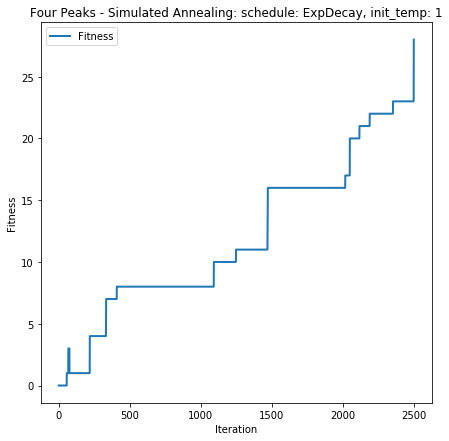

In [13]:
max_attempts = 200
max_iters = 2500
init_temp = 1
schedule = mlrh.ExpDecay(init_temp)
global eval_count
eval_count = 0
best_state, best_fitness, sa_curve = mlrh.simulated_annealing(prob,
                                                             max_attempts=max_attempts,
                                                             max_iters=max_iters,
                                                             random_state=random_state,
                                                             schedule=schedule,
                                                             curve=True)
print("Simulated Annealing - Total Function Evaluations:", eval_count)
plot_fitness_iteration(sa_curve,
                       "Four Peaks - Simulated Annealing: schedule: {}, init_temp: {}".format(schedule.__class__.__name__, init_temp))

# Randomized Hill Climbing

In [28]:
rhc = mlrh.RHCRunner(problem=prob,
                    experiment_name=experiment_name,
                    output_directory=output_directory,
                    seed=random_state,
                    max_attempts=200,
                    iteration_list=[2500],
                    restart_list=[10])
rhc_stats, rhc_curve = rhc.run()

Running rhc
*****************
*** Run START ***
*****************
restarts:[10], max_iters:[2500], current_restart:[0]
runner_name:[rhc], experiment_name:[four_peaks], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[0.0000]
	[0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0// 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0// 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1...

restarts:[10], max_iters:[2500], current_restart:[0]
runner_name:[rhc], experiment_name:[four_peaks], attempt:[201], iteration:[467], done:[True], time:[0.04], fitness:[7.0000]
	[1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0// 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0// 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1...

restarts:[10], max_iters:[2500], current_restart:[1]
runner_name:[rhc], experiment_name:[four_peaks], attempt:[0], iteration:[0], done:[False], time:[0.06], fitness:[0.000

Saving: [four_peaks/four_peaks/rhc__four_peaks__curves_df.csv]


In [37]:
show=10
columns = ['Time', 'Fitness', 'Restarts', 'current_restart']
pd.set_option('display.max_rows',show)
df=pd.read_csv("./four_peaks/four_peaks/rhc__four_peaks__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(show)

,Time,Fitness,Restarts,current_restart
19,1.556132,23.0,10,9
21,1.960634,14.0,10,10
5,0.195303,13.0,10,2
13,0.815081,13.0,10,6
11,0.639576,11.0,10,5
9,0.398278,8.0,10,4
15,0.947102,7.0,10,7
1,0.040760,7.0,10,0
7,0.302325,6.0,10,3
14,0.870834,6.0,10,7


Randomized Hill Climbing - Total Function Evaluations: 5226


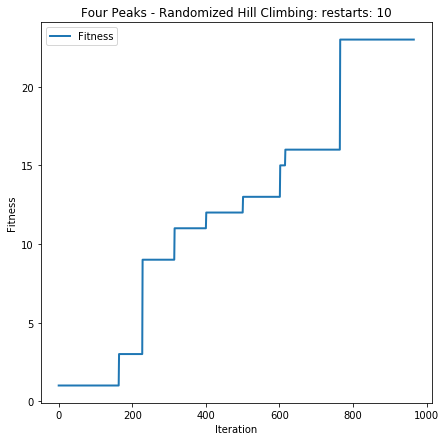

In [12]:
max_attempts = 200
max_iters = 2500
restarts = 10
global eval_count
eval_count = 0
best_state, best_fitness, rhc_curve = mlrh.random_hill_climb(prob,
                                                         max_attempts=max_attempts,
                                                         max_iters=max_iters,
                                                         random_state=random_state,
                                                         restarts=restarts,
                                                         curve=True)
print("Randomized Hill Climbing - Total Function Evaluations:", eval_count)
plot_fitness_iteration(rhc_curve,
                       "Four Peaks - Randomized Hill Climbing: restarts: {}".format(restarts))

## Fitness vs Iterations

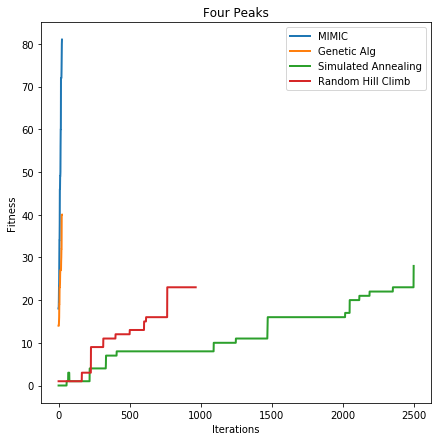

In [15]:
all_curves = {"MIMIC": mimic_curve, "Genetic Alg": gen_curve, "Simulated Annealing": sa_curve, "Random Hill Climb": rhc_curve}

np.array([len(x) for x in all_curves]).max()

plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title("Four Peaks")

for name, curve in all_curves.items():
    plt.plot(range(len(curve)), curve, label=name, lw=2)

    plt.legend(loc="best")
plt.show()

## Function Evaluations vs Input Size

In [16]:
def prob_gen(input=150):
    length = input
    t_pct = 0.9
    global eval_count
    eval_count = 0

    base_fit_func = mlrh.FourPeaks(t_pct=t_pct).evaluate

    def four_peaks_fit(state):
        global eval_count
        eval_count += 1

        return base_fit_func(state)


    # Initialize custom fitness function object
    fitness = mlrh.CustomFitness(four_peaks_fit)

    prob = mlrh.DiscreteOpt(length=length,
                        fitness_fn=fitness,
                        maximize=True)
    
    return prob

In [17]:
def eval_count_mimic(prob):
    s = time.time()
    max_attempts = 100
    max_iters = 25
    keep_pct=0.1
    pop_size = 3000
    global eval_count
    eval_count = 0
    best_state, best_fitness, mimic_curve = mlrh.mimic(prob,
                                             max_attempts=max_attempts,
                                             max_iters=max_iters,
                                             random_state=random_state,
                                             pop_size=pop_size,
                                             keep_pct=keep_pct,
                                             curve=True)
    e = time.time()
    t_diff = e-s
    result = (eval_count, len(mimic_curve), t_diff)
    return result

In [18]:
def eval_count_gen(prob):
    s = time.time()
    max_attempts = 100
    max_iters = 25
    mutation_prob=0.1
    pop_size = 3000
    global eval_count
    eval_count = 0
    best_state, best_fitness, gen_curve = mlrh.genetic_alg(prob,
                                                   max_attempts=max_attempts,
                                                   max_iters=max_iters,
                                                   random_state=random_state,
                                                   pop_size=pop_size,
                                                   mutation_prob=mutation_prob,
                                                   curve=True)
    e = time.time()
    t_diff = e-s
    result = (eval_count, len(gen_curve), t_diff)
    return result

In [19]:
def eval_count_sa(prob):
    s = time.time()
    max_attempts = 200
    max_iters = 2500
    init_temp = 1
    schedule = mlrh.ExpDecay(init_temp)
    global eval_count
    eval_count = 0
    best_state, best_fitness, sa_curve = mlrh.simulated_annealing(prob,
                                                             max_attempts=max_attempts,
                                                             max_iters=max_iters,
                                                             random_state=random_state,
                                                             schedule=schedule,
                                                             curve=True)
    e = time.time()
    t_diff = e-s
    result = (eval_count, len(sa_curve), t_diff)
    return result

In [20]:
def eval_count_rhc(prob):
    s = time.time()
    max_attempts = 200
    max_iters = 2500
    restarts = 10
    global eval_count
    eval_count = 0
    best_state, best_fitness, rhc_curve = mlrh.random_hill_climb(prob,
                                                         max_attempts=max_attempts,
                                                         max_iters=max_iters,
                                                         random_state=random_state,
                                                         restarts=restarts,
                                                         curve=True)
    e = time.time()
    t_diff = e-s
    result = (eval_count, len(rhc_curve), t_diff)
    return result

In [21]:
np.random.seed(1)
inputs = [10, 20, 30, 40, 50, 60, 70, 80]

mimic_curve_eval = [eval_count_mimic(prob_gen(x)) for x in inputs]
gen_curve_eval = [eval_count_gen(prob_gen(x)) for x in inputs]
sa_curve_eval = [eval_count_sa(prob_gen(x)) for x in inputs]
rhc_curve_eval = [eval_count_rhc(prob_gen(x)) for x in inputs]

all_curves = {"MIMIC": mimic_curve_eval,
              "Genetic Alg": gen_curve_eval,
              "Simulated Annealing": sa_curve_eval,
              "Random Hill Climb": rhc_curve_eval}


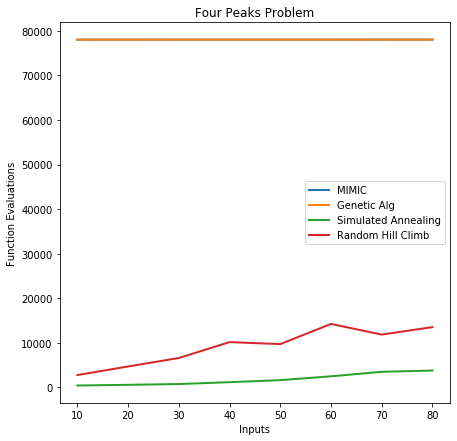

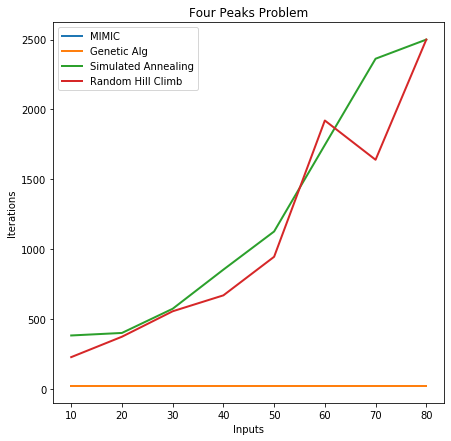

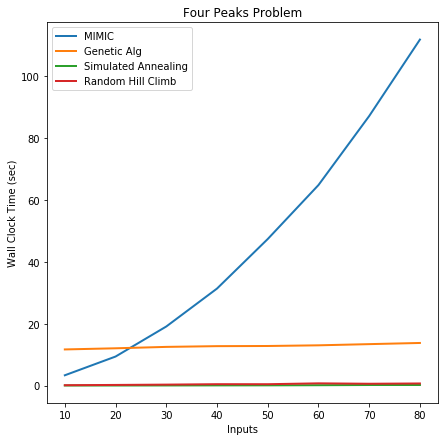

In [22]:
l = [("Inputs", "Function Evaluations"),
     ("Inputs", "Iterations"),
     ("Inputs", "Wall Clock Time (sec)")]

for i in range(3):
    plt.xlabel(l[i][0])
    plt.ylabel(l[i][1])
    plt.title("Four Peaks Problem")

    for name, curve in all_curves.items():
        plt.plot(inputs, [x[i] for x in curve], label=name, lw=2)

        plt.legend(loc="best")
    plt.show()

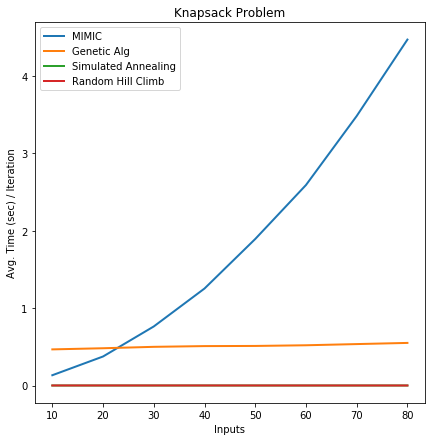

In [23]:
plt.xlabel("Inputs")
plt.ylabel("Avg. Time (sec) / Iteration")
plt.title("Knapsack Problem")

for name, curve in all_curves.items():
    avg_time_div_iterations = np.array([x[2] for x in curve]) / np.array([x[1] for x in curve])
    plt.plot(inputs, avg_time_div_iterations, label=name, lw=2)

    plt.legend(loc="best")
plt.show()